## 1st ML Model


## 1) Load Data


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data Preperation


#### Data Seperation as X and Y


In [3]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [4]:
x = df.drop('logS', axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
# random_state is like a "seed" for the random number generator.
# It ensures that every time you run the code, you get the same split of data.
# This makes your results reproducible.

In [6]:
print("x_train:")
print(x_train)
print("\nx_test:")
print(x_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)

x_train:
     MolLogP    MolWt  NumRotatableBonds  AromaticProportion
107  3.14280  112.216                5.0            0.000000
378 -2.07850  142.070                0.0            0.000000
529 -0.47730  168.152                0.0            0.000000
546 -0.86740  154.125                0.0            0.000000
320  1.62150  100.161                2.0            0.000000
..       ...      ...                ...                 ...
802  3.00254  250.301                1.0            0.842105
53   2.13860   82.146                3.0            0.000000
350  5.76304  256.348                0.0            0.900000
79   3.89960  186.339               10.0            0.000000
792  2.52334  310.297                3.0            0.300000

[915 rows x 4 columns]

x_test:
      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
822   2.91000  172.268                7.0            0.000000
118   7.27400  360.882                1.0            0.666667
347   1.94040  145.161                0.

## Model Building


### Linear Regression

Linear regression is a simple machine learning model that finds the best straight line to describe the relationship between input features (like MolLogP, MolWt, etc.) and the target value (logS). It predicts the target by combining the input features with learned weights, showing how each feature affects the prediction. This model is easy to interpret and is often used as a starting point for regression problems.
Equation of a Line
The model follows the formula:

Equation of a Line
The model follows the formula:
y=mx+b
y = Output (what we want to predict, e.g., house price)
x = Input feature (e.g., house size)

m = Slope (how much y changes per unit change in x)
b = Y-intercept (value of y when x=0)

##### Predicting house prices based on size:
If size (x) increases by 1 sq. ft., price (y) increases by $200 (m=200)
Base price ( might be $50,000 (even if size = 0).

So, the model predicts:
Price=50,000+200×(Size)m

In [ ]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train) #the fit method calculates the slope and y intercept

LinearRegression()

In [9]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [14]:
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

#### Evaluate Model Performance


In [12]:
y_train

107   -4.440
378   -1.250
529   -1.655
546   -1.886
320   -0.740
       ...  
802   -2.925
53    -2.680
350   -7.020
79    -4.800
792   -3.240
Name: logS, Length: 915, dtype: float64

In [13]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [25]:
# MSE (Mean Squared Error) measures the average squared difference between the actual and predicted values.
# A lower MSE means the model's predictions are closer to the actual values.

# R2 score (coefficient of determination) shows how well the model explains the variation in the data.
# An R2 score of 1 means perfect prediction, while 0 means the model does no better than simply predicting the mean.
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [26]:
print(f"Linear Regression Train MSE: {lr_train_mse}")
print(f"Linear Regression Train R2: {lr_train_r2}")
print(f"Linear Regression Test MSE: {lr_test_mse}")
print(f"Linear Regression Test R2: {lr_test_r2}")

Linear Regression Train MSE: 1.007536295109369
Linear Regression Train R2: 0.7645051774663391
Linear Regression Test MSE: 1.0206953660861033
Linear Regression Test R2: 0.7891616188563282


In [27]:
metrics_df = pd.DataFrame({
    'set': ['train', 'test'],
    'MSE': [lr_train_mse, lr_test_mse],
    'R2': [lr_train_r2, lr_test_r2]
})
metrics_df


,set,MSE,R2
0,train,1.007536,0.764505
1,test,1.020695,0.789162


## Random Forest
##### Imagine you’re trying to predict whether a fruit is an apple or an orange based on its color, size, and texture. Instead of asking just one expert (like in Decision Trees), you ask a whole group of experts (a "forest" of trees) and take a majority vote. That’s a Random Forest!
##### How It Works (Step-by-Step)
##### Build Many Decision Trees:
##### Each tree is trained on a random subset of the data (like giving each expert different clues).
##### Each tree also uses a random subset of features (e.g., one tree uses color + size, another uses size + texture).
##### Vote for the Final Prediction:
##### For classification (e.g., apple/orange): The most common answer wins.
##### For regression (e.g., predicting price): The average of all tree predictions is taken.




### Training the model


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train) #.fit takes the avg of all the predicticed values of diff trees
# max_depth sets the maximum depth of each tree in the forest. (means each tree can ask only 2 questions)
# A lower value (like 2) restricts how many splits each tree can make, which helps prevent overfitting.
# If not set, trees can grow until all leaves are pure or contain less than min_samples_split samples.


RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make a prediction


In [20]:
y_rf_train_pred = rf.predict(x_train) #Used to check model fit.
y_rf_test_pred = rf.predict(x_test)   #	Used to check model generalization.

### Evaluate Model Performance


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

In [22]:
metrics_df2 = pd.DataFrame({
    'set': ['train', 'test'],
    'MSE': [rf_train_mse, rf_test_mse],
    'R2': [rf_train_r2, rf_test_r2]
})
metrics_df2

,set,MSE,R2
0,train,1.028228,0.759669
1,test,1.407688,0.709223


In [28]:
## Models Comparision
comparison_df = pd.concat([
    metrics_df.assign(Model='Linear Regression'),
    metrics_df2.assign(Model='Random Forest')
], ignore_index=True)

comparison_df.pivot(index='set', columns='Model', values=['MSE', 'R2'])

MSE                              R2              
Model Linear Regression Random Forest Linear Regression Random Forest
set                                                                  
test           1.020695      1.407688          0.789162      0.709223
train          1.007536      1.028228          0.764505      0.759669

## Data Visualization of prediction results


### Checking LR model results

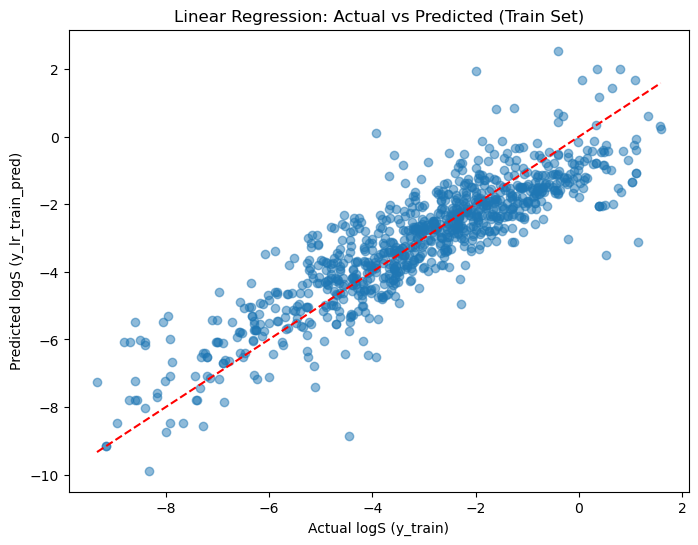

Text(0.5, 1.0, 'Actual vs. Predicted (Test Set)')

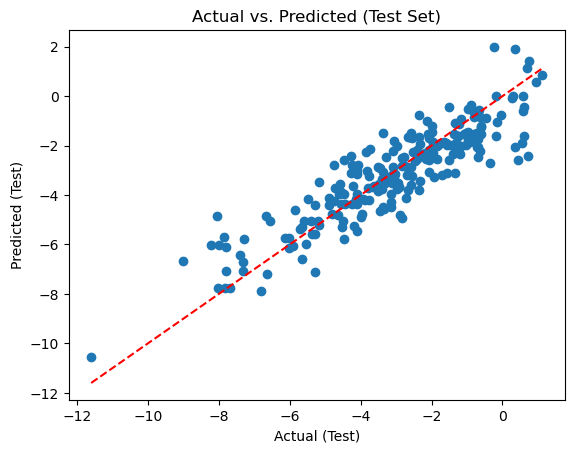

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_lr_train_pred, alpha=0.5)
plt.xlabel('Actual logS (y_train)')
plt.ylabel('Predicted logS (y_lr_train_pred)')
plt.title('Linear Regression: Actual vs Predicted (Train Set)')
# Plot a reference line for perfect prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
plt.show()
plt.scatter(y_test, y_lr_test_pred)     # Plot actual vs. predicted (test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual (Test)")
plt.ylabel("Predicted (Test)")
plt.title("Actual vs. Predicted (Test Set)")

### Checking RF model results

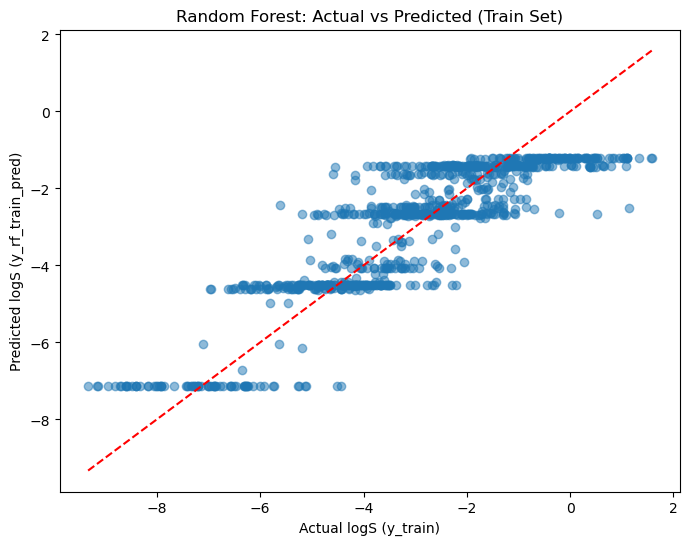

Text(0.5, 1.0, 'Actual vs. Predicted (Test Set)')

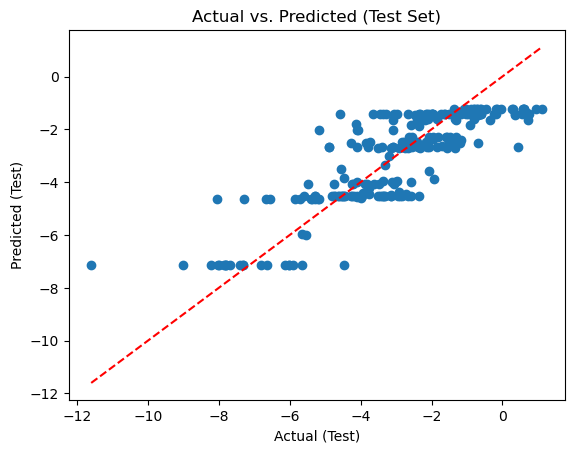

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_rf_train_pred, alpha=0.5)
plt.xlabel('Actual logS (y_train)')
plt.ylabel('Predicted logS (y_rf_train_pred)')
plt.title('Random Forest: Actual vs Predicted (Train Set)')
# Plot a reference line for perfect prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--')
plt.show()
plt.scatter(y_test, y_rf_test_pred)     # Plot actual vs. predicted (test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual (Test)")
plt.ylabel("Predicted (Test)")
plt.title("Actual vs. Predicted (Test Set)")